# Elementare Ein- und Zwei-Qubit-Gates mit Qiskit

### 0. Importiere Qiskit, Numpy etc.

In [1]:
from qiskit import *
from qiskit.providers.ibmq import least_busy
from qiskit import Aer
from qiskit.compiler import assemble
from qiskit.visualization import plot_histogram
from qiskit.extensions import *

import numpy as np
import random

### 1. Definiere den Schaltkreis durch Anzahl der Qubits und Bits
#### hier: Ein Qubit und ein Bit

In [2]:
qreg = QuantumRegister(1, 'q')
creg = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg, creg)

### 2. Wende die entsprechenden Gates auf das Qubit an

In [3]:
circuit.h(qreg[0])

### 3. Visualisiere den Schaltkreis

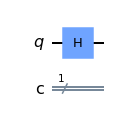

In [4]:
circuit.draw('mpl')

### 4. Führe den Schaltkreis aus
#### a) mit dem Statevector-Simulator

In [5]:
backend = Aer.get_backend('statevector_simulator')

qobj = assemble(circuit)
result = backend.run(qobj).result()

outputstate = result.get_statevector(circuit, decimals=3)
print(outputstate)

Statevector([0.707+0.j, 0.707+0.j],
            dims=(2,))


#### b) mit dem Qasm-Simulator

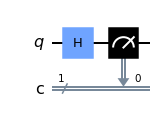

In [6]:
qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg, creg)

circuit.h(qreg[0])
circuit.measure(qreg[0], creg[0])

circuit.draw('mpl')


In [7]:
backend = Aer.get_backend('qasm_simulator')

qobj = assemble(circuit)

result_sim = backend.run(qobj, shots=1024).result()
  
counts = result_sim.get_counts(circuit)
print(counts)

{'1': 516, '0': 508}


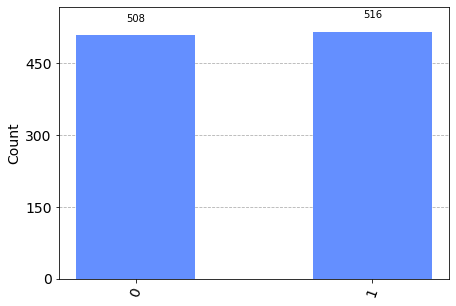

In [8]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

### 5. Definiere den Bell-Zustand und führe ihn mit dem Qasm-Simulator aus

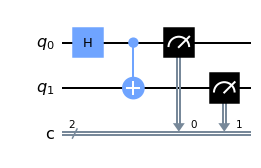

In [9]:
qreg = QuantumRegister(2, 'q')
creg = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg, creg)

circuit.h(qreg[0])
circuit.cnot(qreg[0],qreg[1])
circuit.measure(qreg[0], creg[0])
circuit.measure(qreg[1], creg[1])

circuit.draw('mpl')


In [10]:
backend = Aer.get_backend('qasm_simulator')

qobj = assemble(circuit)

result_sim = backend.run(qobj, shots=1024).result()

counts = result_sim.get_counts(circuit)
print(counts)

{'00': 514, '11': 510}


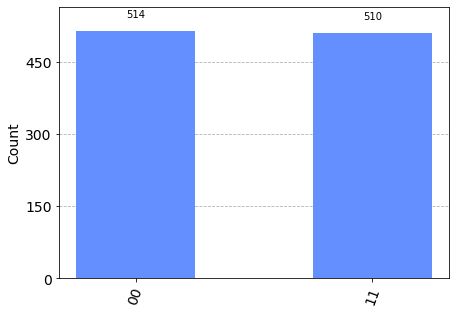

In [11]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)


### 5. Führe den Schaltkreis auf einem echten Quantencomputer aus


#### Voraussetzung:

Um dieses Experiment auszuführen, muss man sich auf https://quantum-computing.ibm.com/login
anmelden und dort einen API-Token generieren. Diesen dann mit 

*from qiskit import IBMQ*

*IBMQ.save_account('MY_API_TOKEN')*

lokal abspeichern.

least busy backend:  ibmq_quito
Job Status: job has successfully run


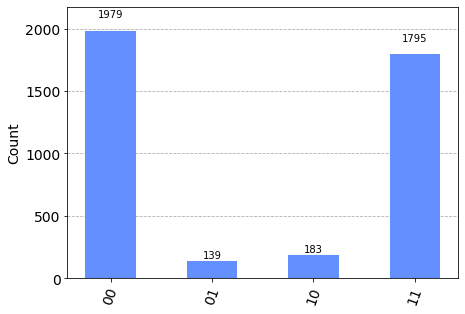

In [12]:
shots = 4096

# Lade die Account Informationen
IBMQ.load_account()

provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2
and not x.configuration().simulator
and x.status().operational==True))
print("least busy backend: ", backend)

job = execute(circuit, backend=backend, shots=shots)

from qiskit.tools.monitor import job_monitor
job_monitor(job)

result = job.result()
plot_histogram(result.get_counts(circuit))

In [13]:
import qiskit.tools.jupyter
%qiskit_version_table